# Do the Eda on this Dataset :Presidential Election Polls 2024 Dataset and extract useful information from this:

In [34]:
import os
os.chdir('C:\\Users\\Manab Das\\Downloads\\PWSkills\\EDA')

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
data=pd.read_csv('election2024.csv')
data.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [87]:
data.shape

(1600, 16)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [89]:
data.isna().any()

id                     False
sex                    False
age                    False
federal_district       False
type_of_city           False
knows_election_date    False
will_vote              False
candidate              False
television_usage       False
internet_usage         False
education              False
income                 False
employment             False
job_type                True
company_type            True
weight1                False
dtype: bool

In [90]:
data.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [91]:
# Show summary statistics for numerical columns
data.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [92]:
data.describe(include=['object'])

,id,sex,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type
count,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,692,879
unique,1600,2,8,7,4,6,7,6,6,6,6,11,6,21
top,07169ed8148ce047,female,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,commercial organization,"industry, manufacturing"
freq,1,843,425,391,1361,1062,1128,490,613,690,949,535,445,138


In [93]:
# Fill missing values for 'job_type' and 'company_type' with 'Unknown'
data['job_type'].fillna('Unknown', inplace=True)
data['company_type'].fillna('Unknown', inplace=True)

In [94]:
# Convert to categorical data type
categorical_columns = ['knows_election_date', 'will_vote', 'television_usage', 'internet_usage', 'education']
data[categorical_columns] = data[categorical_columns].astype('category')

Text(0, 0.5, 'Frequency')

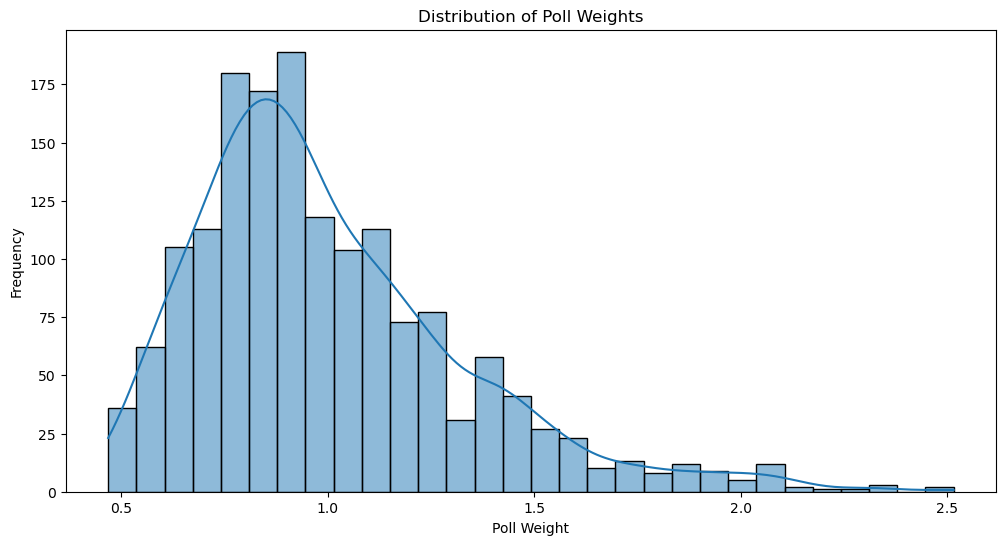

In [95]:
plt.figure(figsize=(12, 6))
sns.histplot(data['weight1'], bins=30, kde=True)
plt.title('Distribution of Poll Weights')
plt.xlabel('Poll Weight')
plt.ylabel('Frequency')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Putin'),
  Text(1, 0, 'Davankov'),
  Text(2, 0, 'will not take part'),
  Text(3, 0, 'spoilt vote'),
  Text(4, 0, 'Kharitonov'),
  Text(5, 0, 'struggle to answer'),
  Text(6, 0, 'Slutskiy')])

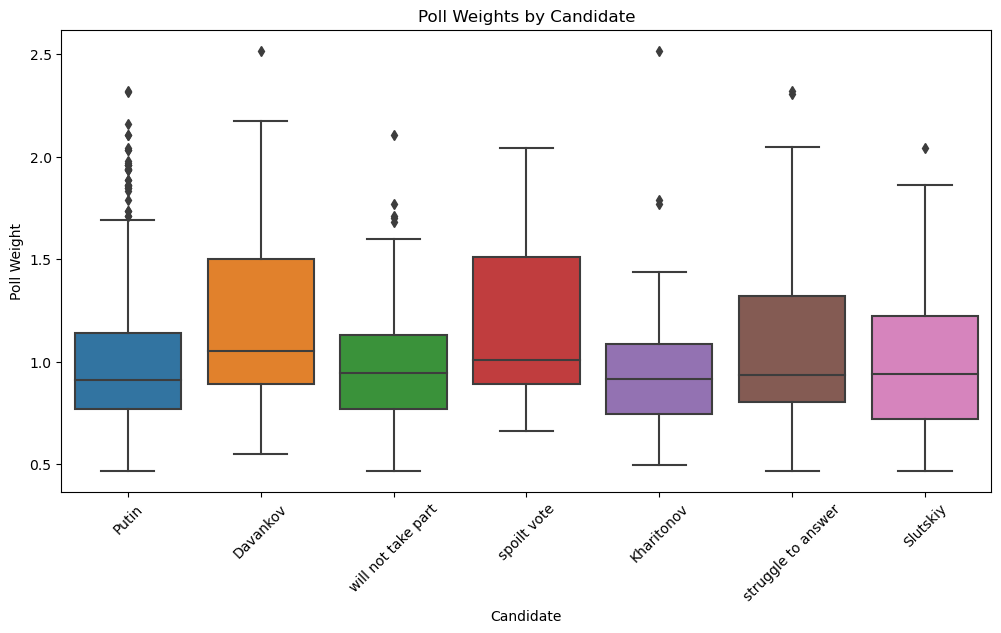

In [96]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='candidate', y='weight1', data=data)
plt.title('Poll Weights by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Poll Weight')
plt.xticks(rotation=45)

Text(0, 0.5, 'Poll Weight')

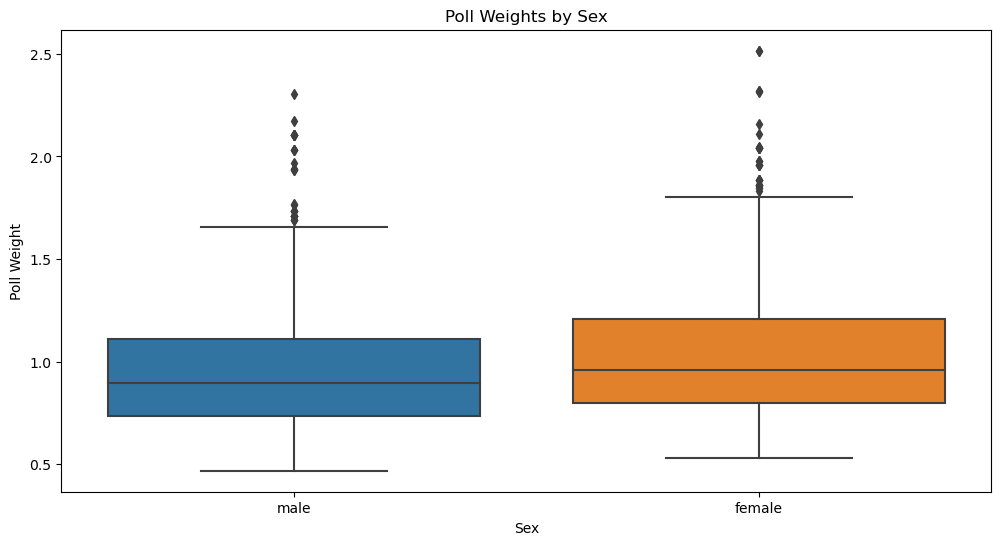

In [97]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='weight1', data=data)
plt.title('Poll Weights by Sex')
plt.xlabel('Sex')
plt.ylabel('Poll Weight')

Text(0, 0.5, 'Poll Weight')

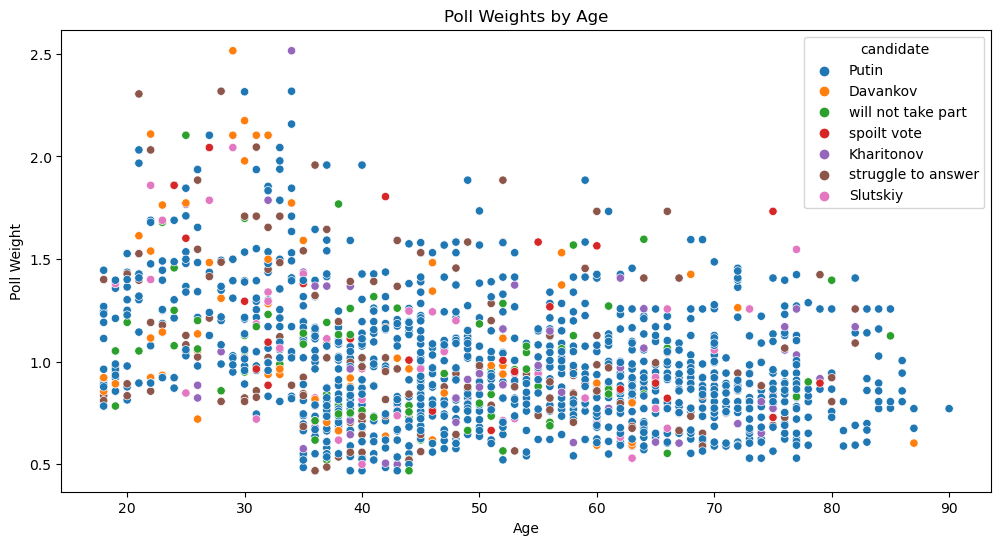

In [98]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='weight1', data=data, hue='candidate')
plt.title('Poll Weights by Age')
plt.xlabel('Age')
plt.ylabel('Poll Weight')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'north caucasian'),
  Text(1, 0, 'volga'),
  Text(2, 0, 'northwestern'),
  Text(3, 0, 'southern'),
  Text(4, 0, 'central'),
  Text(5, 0, 'ural'),
  Text(6, 0, 'siberian'),
  Text(7, 0, 'far eastern')])

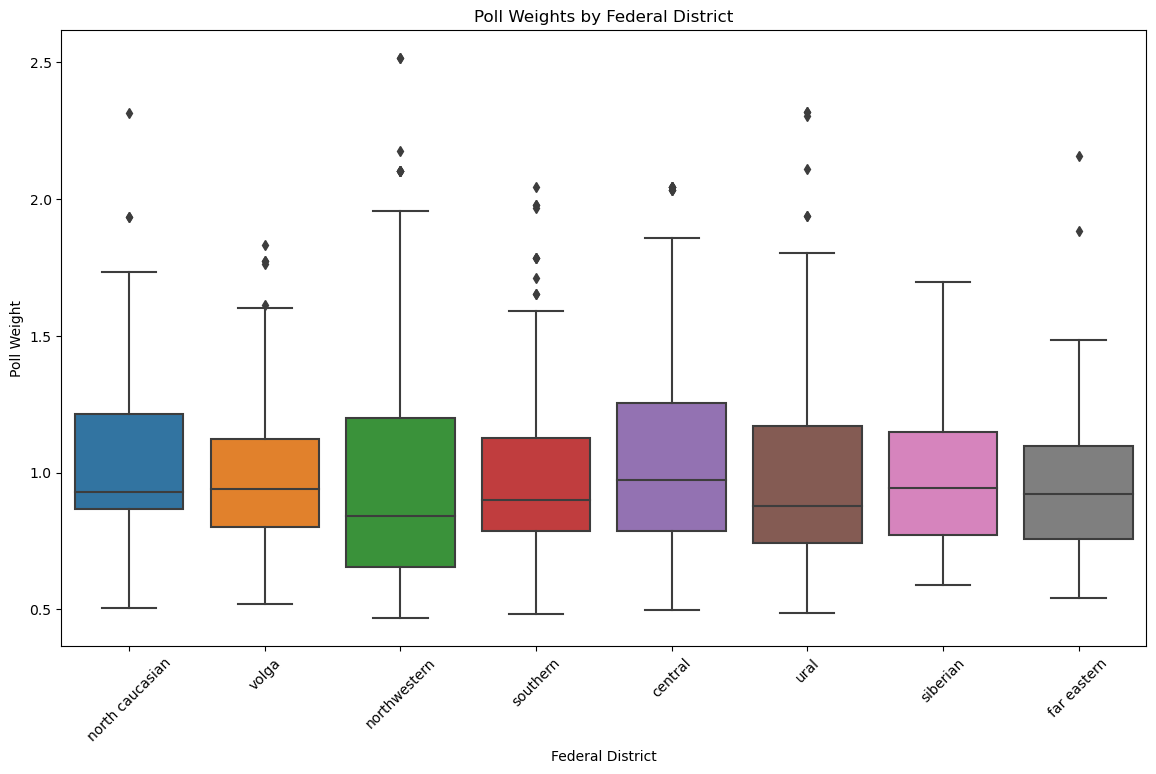

In [99]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='federal_district', y='weight1', data=data)
plt.title('Poll Weights by Federal District')
plt.xlabel('Federal District')
plt.ylabel('Poll Weight')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'village'),
  Text(1, 0, 'city with population of less than 50k'),
  Text(2, 0, 'city with population of 1 million and higher'),
  Text(3, 0, 'city with population of 50-100k'),
  Text(4, 0, 'city with population of 100-500k'),
  Text(5, 0, 'settlement'),
  Text(6, 0, 'city with population of 500-950k')])

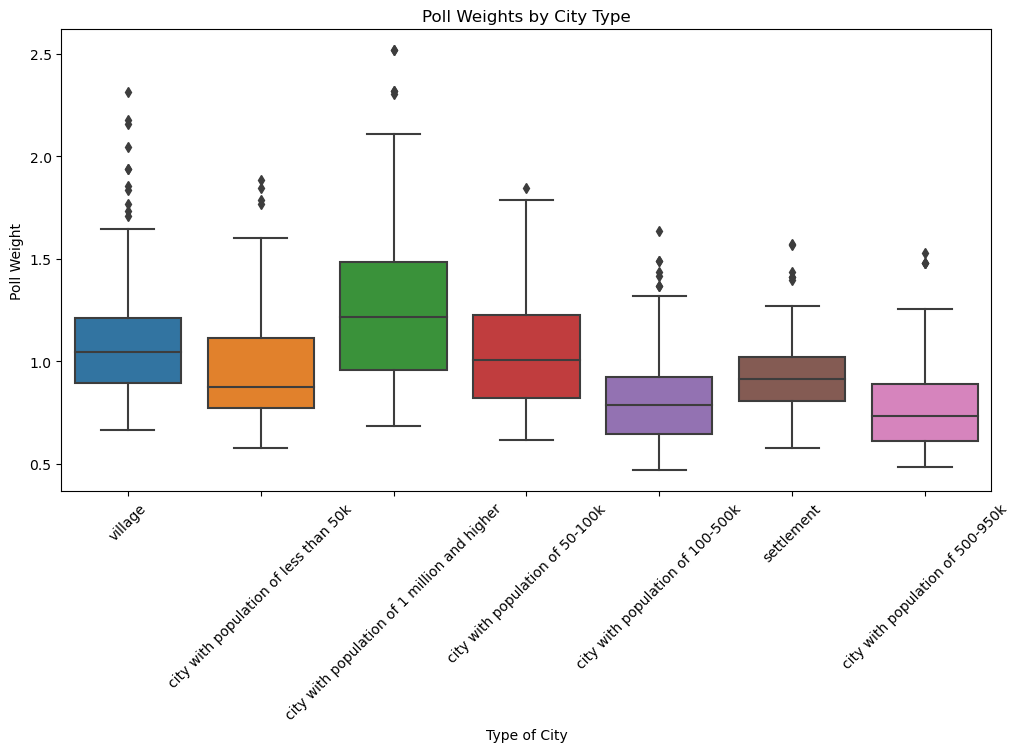

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type_of_city', y='weight1', data=data)
plt.title('Poll Weights by City Type')
plt.xlabel('Type of City')
plt.ylabel('Poll Weight')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'does not watch'),
  Text(1, 0, 'less than 4 hours a day'),
  Text(2, 0, 'once half a year'),
  Text(3, 0, 'over 4 hours a day'),
  Text(4, 0, 'several times a month'),
  Text(5, 0, 'several times a week')])

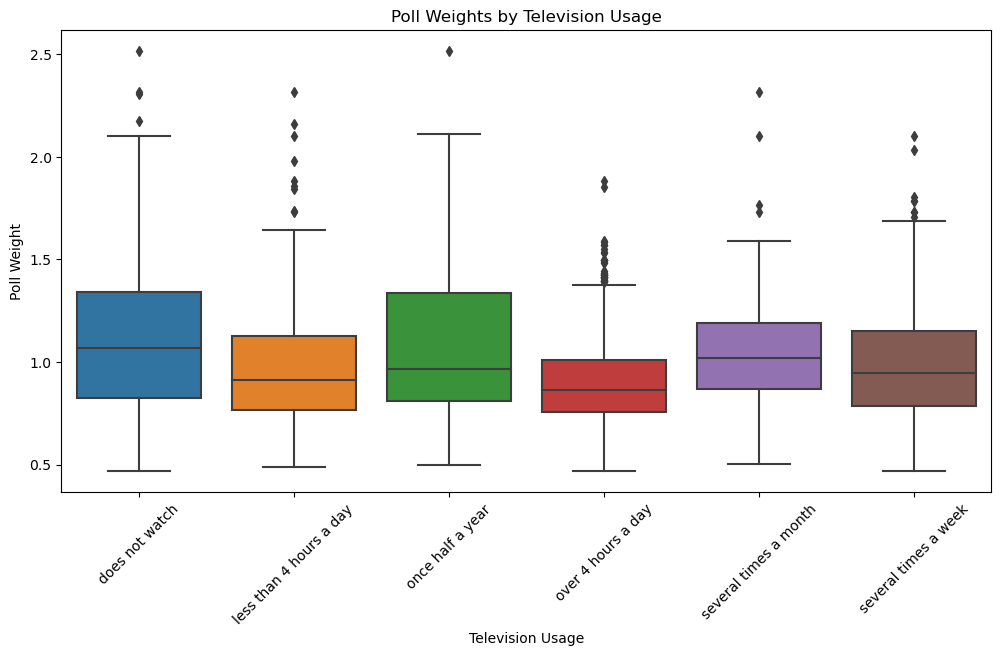

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='television_usage', y='weight1', data=data)
plt.title('Poll Weights by Television Usage')
plt.xlabel('Television Usage')
plt.ylabel('Poll Weight')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'does not use internet'),
  Text(1, 0, 'less than 4 hours a day'),
  Text(2, 0, 'once half a year'),
  Text(3, 0, 'over 4 hours a day'),
  Text(4, 0, 'several times a month'),
  Text(5, 0, 'several times a week')])

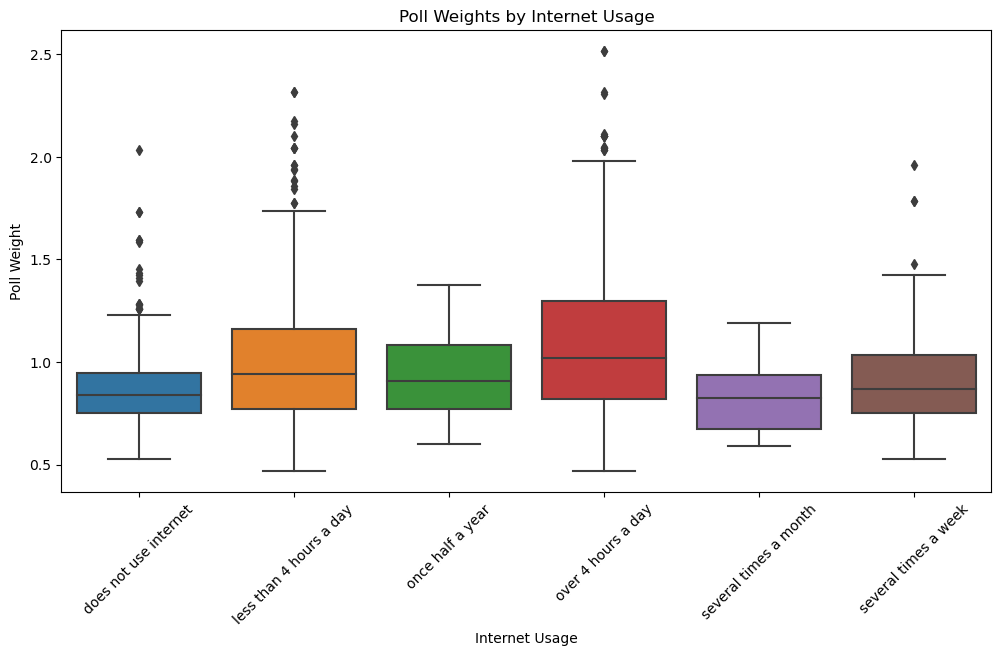

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='internet_usage', y='weight1', data=data)
plt.title('Poll Weights by Internet Usage')
plt.xlabel('Internet Usage')
plt.ylabel('Poll Weight')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation Matrix')

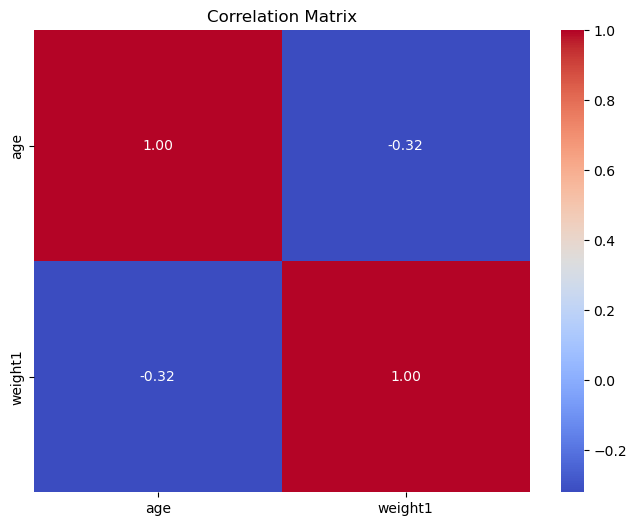

In [103]:
# Compute correlation matrix for numerical data
correlation_matrix = data[['age', 'weight1']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

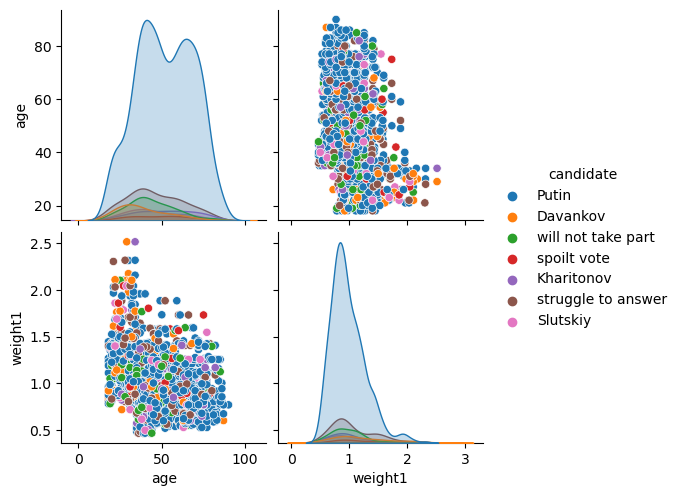

In [104]:
sns.pairplot(data[['age', 'weight1', 'candidate']].dropna(), hue='candidate')
plt.show()

In [106]:
data.to_csv('cleaned_russian_election_poll_2024.csv', index=False)